$$ Sales Analysis $$

# Project Statement:
AAL has been a well-known name in Australia, particularly recognized for its clothing business since 2000. The company serves diverse demographics, including kids, women, men, and seniors, and has established branches across various states in Australia, encompassing metropolises as well as tier-1 and tier-2 cities.year.


Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the Head of Sales and Marketing (S&M) at AAL. The specific tasks include:


1. Identify the states that are generating the highest revenues.

2. Develop sales programs for states with lower revenues. The Head of Sales and Marketing has requested your assistance with this task.


Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.

## Solution

Import the pandas and NumPy libraries
Read the 1688639662_ausapparalsales4thqrt2020.csv file into a DataFrame

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
%matplotlib inline

In [2]:
df = pd.read_csv('1688639662_ausapparalsales4thqrt2020.csv')

Print the data frame

In [3]:
df

Date        Time State     Group  Unit  Sales
0      1-Oct-20     Morning    WA      Kids     8  20000
1      1-Oct-20     Morning    WA       Men     8  20000
2      1-Oct-20     Morning    WA     Women     4  10000
3      1-Oct-20     Morning    WA   Seniors    15  37500
4      1-Oct-20   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555  30-Dec-20   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-20     Evening   TAS      Kids    15  37500
7557  30-Dec-20     Evening   TAS       Men    15  37500
7558  30-Dec-20     Evening   TAS     Women    11  27500
7559  30-Dec-20     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]

### 1.	Data wrangling

#### 1a. Ensure that the data is clean and free from any missing or incorrect entries.


    Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().


In [4]:
df.isna()

Date   Time  State  Group   Unit  Sales
0     False  False  False  False  False  False
1     False  False  False  False  False  False
2     False  False  False  False  False  False
3     False  False  False  False  False  False
4     False  False  False  False  False  False
...     ...    ...    ...    ...    ...    ...
7555  False  False  False  False  False  False
7556  False  False  False  False  False  False
7557  False  False  False  False  False  False
7558  False  False  False  False  False  False
7559  False  False  False  False  False  False

[7560 rows x 6 columns]

df.notna()

Let's count the number of null values in each column of the DataFrame.

In [5]:
df.isnull().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

#### 1b __Observation__

Here, we can see no column has null values. Hence we can proceed with next steps without treating any null/missing values.

If there are any null values, we can drop them by using dropna() or fill them by fillna().
To fill the missing values we can use fillna() with method forward or backward fill. we can also use statistical mean or median.

In [6]:
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

Here, we can see some of the columns contain data of the type object. They can be strings.

Since we want the data to be uniform and formatted, let's convert all objects into strings.

In [7]:
cols = list(df.select_dtypes(np.object_).columns)

In [8]:
df[cols] = df[cols].astype('string')

In [9]:
df.dtypes

Date     string[python]
Time     string[python]
State    string[python]
Group    string[python]
Unit              int64
Sales             int64
dtype: object

From all the columns, check if the data has any discrepancies.

In [10]:
df.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [11]:
df['State']

0         WA
1         WA
2         WA
3         WA
4         WA
        ... 
7555     TAS
7556     TAS
7557     TAS
7558     TAS
7559     TAS
Name: State, Length: 7560, dtype: string

### 1c. Identify if there are any discrepencies in the data before normalizing

In [12]:
df['Date'].unique()

<StringArray>
[ '1-Oct-20',  '2-Oct-20',  '3-Oct-20',  '4-Oct-20',  '5-Oct-20',  '6-Oct-20',
  '7-Oct-20',  '8-Oct-20',  '9-Oct-20', '10-Oct-20', '11-Oct-20', '12-Oct-20',
 '13-Oct-20', '14-Oct-20', '15-Oct-20', '16-Oct-20', '17-Oct-20', '18-Oct-20',
 '19-Oct-20', '20-Oct-20', '21-Oct-20', '22-Oct-20', '23-Oct-20', '24-Oct-20',
 '25-Oct-20', '26-Oct-20', '27-Oct-20', '28-Oct-20', '29-Oct-20', '30-Oct-20',
  '1-Nov-20',  '2-Nov-20',  '3-Nov-20',  '4-Nov-20',  '5-Nov-20',  '6-Nov-20',
  '7-Nov-20',  '8-Nov-20',  '9-Nov-20', '10-Nov-20', '11-Nov-20', '12-Nov-20',
 '13-Nov-20', '14-Nov-20', '15-Nov-20', '16-Nov-20', '17-Nov-20', '18-Nov-20',
 '19-Nov-20', '20-Nov-20', '21-Nov-20', '22-Nov-20', '23-Nov-20', '24-Nov-20',
 '25-Nov-20', '26-Nov-20', '27-Nov-20', '28-Nov-20', '29-Nov-20', '30-Nov-20',
  '1-Dec-20',  '2-Dec-20',  '3-Dec-20',  '4-Dec-20',  '5-Dec-20',  '6-Dec-20',
  '7-Dec-20',  '8-Dec-20',  '9-Dec-20', '10-Dec-20', '11-Dec-20', '12-Dec-20',
 '13-Dec-20', '14-Dec-20', '15-Dec-20'

In [13]:
df['Time'].unique()

<StringArray>
[' Morning', ' Afternoon', ' Evening']
Length: 3, dtype: string

In [14]:
df['State'].unique()

<StringArray>
[' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS']
Length: 7, dtype: string

In [15]:
df['Group'].unique()

<StringArray>
[' Kids', ' Men', ' Women', ' Seniors']
Length: 4, dtype: string

In [16]:
df['Unit'].unique()

array([ 8,  4, 15,  3, 10, 11, 13,  5,  6,  9, 14, 12, 16, 28, 21, 29, 22,
       32, 49, 36, 34, 26, 31, 27, 43, 50, 44, 20, 18, 19, 39, 17, 23, 40,
       30,  7, 33, 42, 46, 48, 37, 25, 35, 45, 47, 38, 41, 24,  2, 51, 63,
       62, 52, 56, 59, 64, 53, 61, 54, 60, 55, 65, 57, 58], dtype=int64)

In [17]:
df['Sales'].unique()

array([ 20000,  10000,  37500,   7500,  25000,  27500,  32500,  12500,
        15000,  22500,  35000,  30000,  40000,  70000,  52500,  72500,
        55000,  80000, 122500,  90000,  85000,  65000,  77500,  67500,
       107500, 125000, 110000,  50000,  45000,  47500,  97500,  42500,
        57500, 100000,  75000,  17500,  82500, 105000, 115000, 120000,
        92500,  62500,  87500, 112500, 117500,  95000, 102500,  60000,
         5000, 127500, 157500, 155000, 130000, 140000, 147500, 160000,
       132500, 152500, 135000, 150000, 137500, 162500, 142500, 145000],
      dtype=int64)

Since all the data has unique values & there are no discrepancies we can proceed with next step i.e. scaling.

### Lets choose min-max scaling for normalization.

In [18]:
df['Unit_Norm'] = np.nan
df['Unit_Norm'] = (df['Unit'] - df['Unit'].min() ) / (df['Unit'].max() - df['Unit'].min())

In [19]:
df['Unit_Norm']

0       0.095238
1       0.095238
2       0.031746
3       0.206349
4       0.015873
          ...   
7555    0.190476
7556    0.206349
7557    0.206349
7558    0.142857
7559    0.174603
Name: Unit_Norm, Length: 7560, dtype: float64

In [20]:
 df['Sales_Norm'] = np.nan

In [21]:
df['Sales_Norm'] = (df['Sales'] - df['Sales'].min() ) / (df['Sales'].max() - df['Sales'].min())

In [22]:
df['Sales_Norm']

0       0.095238
1       0.095238
2       0.031746
3       0.206349
4       0.015873
          ...   
7555    0.190476
7556    0.206349
7557    0.206349
7558    0.142857
7559    0.174603
Name: Sales_Norm, Length: 7560, dtype: float64

In [23]:
df['Sales']

0       20000
1       20000
2       10000
3       37500
4        7500
        ...  
7555    35000
7556    37500
7557    37500
7558    27500
7559    32500
Name: Sales, Length: 7560, dtype: int64

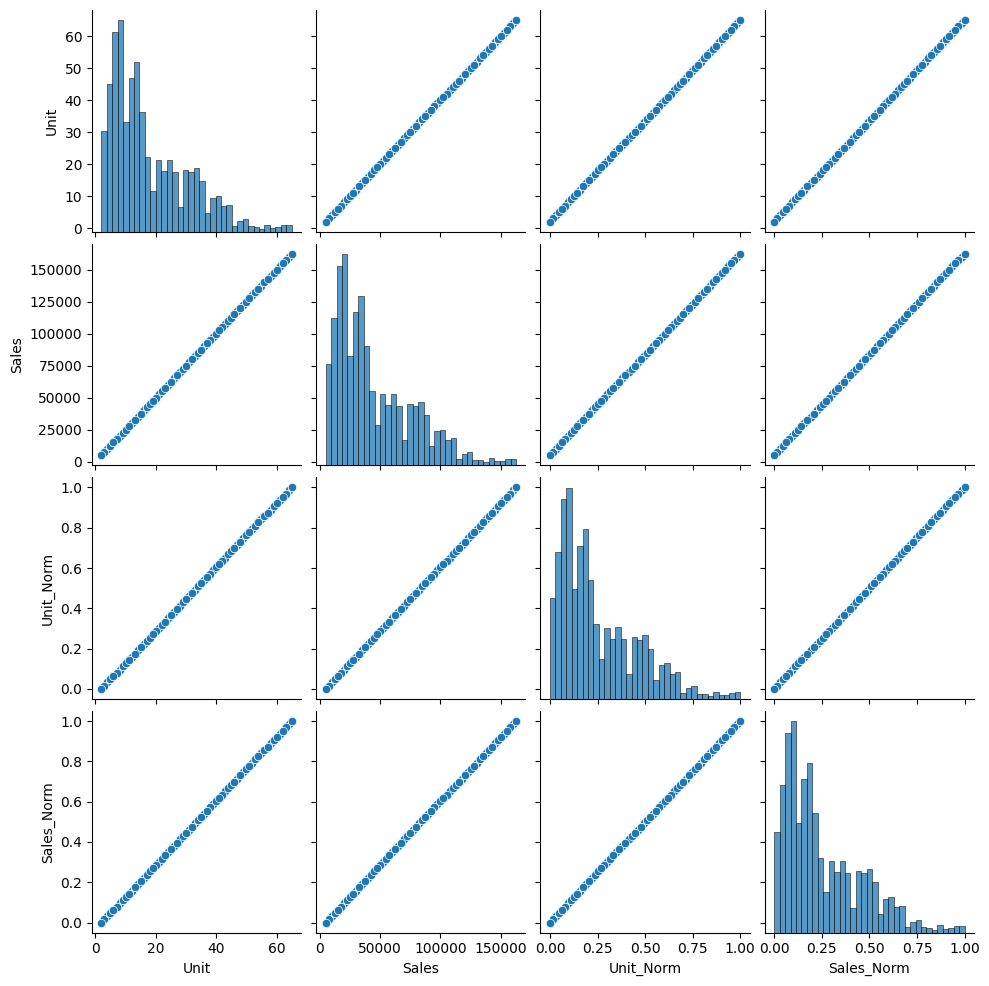

In [24]:
sns.pairplot(df)

#### 1d. Insights on GroupBy() function 

The GroupBy() function in Pandas is a powerful tool for grouping data based on one or more columns and applying a function to each group. It is commonly used for data aggregation, data chunking, and data merging etc.

When using GroupBy() for data chunking, the function can be used to split a large dataset into smaller, more manageable chunks. This can be useful when working with large datasets that are too big to fit into memory all at once. By splitting the data into smaller chunks, it becomes easier to work with and analyze.

When using GroupBy() for data merging, the function can be used to combine multiple datasets into a single dataset. This can be useful when working with data that is spread across multiple files or tables. By merging the data together, it becomes easier to analyze and draw insights.

Based on my analysis, I recommend using the GroupBy() function for data chunking when working with large datasets that are too big to fit into memory all at once. By splitting the data into smaller chunks, it becomes easier to work with and analyze. However, when working with smaller datasets, it may be more efficient to use other functions such as merge() or concat() for data merging.

# 2. Data analysis

#### 2a. Descriptive statistical analysis

In [25]:
df.describe()

Unit          Sales    Unit_Norm   Sales_Norm
count  7560.000000    7560.000000  7560.000000  7560.000000
mean     18.005423   45013.558201     0.254054     0.254054
std      12.901403   32253.506944     0.204784     0.204784
min       2.000000    5000.000000     0.000000     0.000000
25%       8.000000   20000.000000     0.095238     0.095238
50%      14.000000   35000.000000     0.190476     0.190476
75%      26.000000   65000.000000     0.380952     0.380952
max      65.000000  162500.000000     1.000000     1.000000

In [26]:
df.describe(percentiles=[0.1,0.3,0.5,0.7,0.9])

Unit          Sales    Unit_Norm   Sales_Norm
count  7560.000000    7560.000000  7560.000000  7560.000000
mean     18.005423   45013.558201     0.254054     0.254054
std      12.901403   32253.506944     0.204784     0.204784
min       2.000000    5000.000000     0.000000     0.000000
10%       5.000000   12500.000000     0.047619     0.047619
30%       9.000000   22500.000000     0.111111     0.111111
50%      14.000000   35000.000000     0.190476     0.190476
70%      23.000000   57500.000000     0.333333     0.333333
90%      37.000000   92500.000000     0.555556     0.555556
max      65.000000  162500.000000     1.000000     1.000000

In [27]:
t = df.groupby('Time')
t

In [28]:
for Time, Time_df in t:
    print(Time)
    print(Time_df)

 Afternoon
           Date        Time State     Group  Unit  Sales  Unit_Norm  \
4      1-Oct-20   Afternoon    WA      Kids     3   7500   0.015873   
5      1-Oct-20   Afternoon    WA       Men    10  25000   0.126984   
6      1-Oct-20   Afternoon    WA     Women     3   7500   0.015873   
7      1-Oct-20   Afternoon    WA   Seniors    11  27500   0.142857   
16     1-Oct-20   Afternoon    NT      Kids    13  32500   0.174603   
...         ...         ...   ...       ...   ...    ...        ...   
7543  30-Dec-20   Afternoon   NSW   Seniors    19  47500   0.269841   
7552  30-Dec-20   Afternoon   TAS      Kids     6  15000   0.063492   
7553  30-Dec-20   Afternoon   TAS       Men    15  37500   0.206349   
7554  30-Dec-20   Afternoon   TAS     Women    10  25000   0.126984   
7555  30-Dec-20   Afternoon   TAS   Seniors    14  35000   0.190476   

      Sales_Norm  
4       0.015873  
5       0.126984  
6       0.015873  
7       0.142857  
16      0.174603  
...          ...  
754

In [29]:
t.max()

Date State   Group  Unit   Sales  Unit_Norm  Sales_Norm
Time                                                                   
 Afternoon  9-Oct-20    WA   Women    65  162500        1.0         1.0
 Evening    9-Oct-20    WA   Women    65  162500        1.0         1.0
 Morning    9-Oct-20    WA   Women    65  162500        1.0         1.0

In [30]:
t.min()

Date State  Group  Unit  Sales  Unit_Norm  Sales_Norm
Time                                                                 
 Afternoon  1-Dec-20   NSW   Kids     2   5000        0.0         0.0
 Evening    1-Dec-20   NSW   Kids     2   5000        0.0         0.0
 Morning    1-Dec-20   NSW   Kids     2   5000        0.0         0.0

In [31]:
t.describe()

Unit                                                     Sales  \
             count       mean        std  min  25%   50%   75%   max   count   
Time                                                                           
 Afternoon  2520.0  18.096429  12.927372  2.0  8.0  14.0  26.0  65.0  2520.0   
 Evening    2520.0  17.791667  12.834761  2.0  8.0  14.0  26.0  65.0  2520.0   
 Morning    2520.0  18.128175  12.944251  2.0  8.0  14.0  26.0  65.0  2520.0   

                          ... Unit_Norm      Sales_Norm                      \
                    mean  ...       75%  max      count      mean       std   
Time                      ...                                                 
 Afternoon  45241.071429  ...  0.380952  1.0     2520.0  0.255499  0.205196   
 Evening    44479.166667  ...  0.380952  1.0     2520.0  0.250661  0.203726   
 Morning    45320.436508  ...  0.380952  1.0     2520.0  0.256003  0.205464   

                                                    
            min       25%       50%       75%  max  
Time                                                
 Afternoon  0.0  0.095238  0.190476  0.380952  1.0  
 Evening    0.0  0.095238  0.190476  0.380952  1.0  
 Morning    0.0  0.095238  0.190476  0.380952  1.0  

[3 rows x 32 columns]

In [32]:
demograph = df.groupby('Group')
demograph.max()

Date      Time State  Unit   Sales  Unit_Norm  Sales_Norm
Group                                                                  
 Kids     9-Oct-20   Morning    WA    65  162500   1.000000    1.000000
 Men      9-Oct-20   Morning    WA    64  160000   0.984127    0.984127
 Seniors  9-Oct-20   Morning    WA    65  162500   1.000000    1.000000
 Women    9-Oct-20   Morning    WA    65  162500   1.000000    1.000000

In [33]:
demograph.min()

Date        Time State  Unit  Sales  Unit_Norm  Sales_Norm
Group                                                                   
 Kids     1-Dec-20   Afternoon   NSW     2   5000        0.0         0.0
 Men      1-Dec-20   Afternoon   NSW     2   5000        0.0         0.0
 Seniors  1-Dec-20   Afternoon   NSW     2   5000        0.0         0.0
 Women    1-Dec-20   Afternoon   NSW     2   5000        0.0         0.0

In [34]:
demograph.describe()

Unit                                                     Sales  \
           count       mean        std  min  25%   50%   75%   max   count   
Group                                                                        
 Kids     1890.0  18.004762  12.748596  2.0  8.0  14.0  26.0  65.0  1890.0   
 Men      1890.0  18.148148  12.870872  2.0  8.0  14.0  26.0  64.0  1890.0   
 Seniors  1890.0  17.785714  12.878144  2.0  8.0  14.0  25.0  65.0  1890.0   
 Women    1890.0  18.083069  13.112656  2.0  8.0  14.0  27.0  65.0  1890.0   

                        ... Unit_Norm           Sales_Norm            \
                  mean  ...       75%       max      count      mean   
Group                   ...                                            
 Kids     45011.904762  ...  0.380952  1.000000     1890.0  0.254044   
 Men      45370.370370  ...  0.380952  0.984127     1890.0  0.256320   
 Seniors  44464.285714  ...  0.365079  1.000000     1890.0  0.250567   
 Women    45207.671958  ...  0.396825  1.000000     1890.0  0.255287   

                                                                 
               std  min       25%       50%       75%       max  
Group                                                            
 Kids     0.202359  0.0  0.095238  0.190476  0.380952  1.000000  
 Men      0.204300  0.0  0.095238  0.190476  0.380952  0.984127  
 Seniors  0.204415  0.0  0.095238  0.190476  0.365079  1.000000  
 Women    0.208137  0.0  0.095238  0.190476  0.396825  1.000000  

[4 rows x 32 columns]

In [35]:
state = df.groupby('State')
state.max()

Date      Time   Group  Unit   Sales  Unit_Norm  Sales_Norm
State                                                                 
 NSW   9-Oct-20   Morning   Women    45  112500   0.682540    0.682540
 NT    9-Oct-20   Morning   Women    15   37500   0.206349    0.206349
 QLD   9-Oct-20   Morning   Women    25   62500   0.365079    0.365079
 SA    9-Oct-20   Morning   Women    35   87500   0.523810    0.523810
 TAS   9-Oct-20   Morning   Women    15   37500   0.206349    0.206349
 VIC   9-Oct-20   Morning   Women    65  162500   1.000000    1.000000
 WA    9-Oct-20   Morning   Women    15   37500   0.206349    0.206349

In [36]:
state.min()

Date        Time  Group  Unit  Sales  Unit_Norm  Sales_Norm
State                                                                 
 NSW   1-Dec-20   Afternoon   Kids    12  30000   0.158730    0.158730
 NT    1-Dec-20   Afternoon   Kids     2   5000   0.000000    0.000000
 QLD   1-Dec-20   Afternoon   Kids     3   7500   0.015873    0.015873
 SA    1-Dec-20   Afternoon   Kids    10  25000   0.126984    0.126984
 TAS   1-Dec-20   Afternoon   Kids     2   5000   0.000000    0.000000
 VIC   1-Dec-20   Afternoon   Kids    20  50000   0.285714    0.285714
 WA    1-Dec-20   Afternoon   Kids     2   5000   0.000000    0.000000

In [37]:
state.describe()

Unit                                                       Sales  \
        count       mean        std   min   25%   50%   75%   max   count   
State                                                                       
 NSW   1080.0  27.766667   8.250661  12.0  21.0  28.0  34.0  45.0  1080.0   
 NT    1080.0   8.362963   3.584763   2.0   6.0   8.0  11.0  15.0  1080.0   
 QLD   1080.0  12.376852   5.337855   3.0   8.0  12.0  16.0  25.0  1080.0   
 SA    1080.0  21.799074   6.984386  10.0  16.0  21.0  27.0  35.0  1080.0   
 TAS   1080.0   8.429630   3.609874   2.0   6.0   8.0  11.0  15.0  1080.0   
 VIC   1080.0  39.098148  10.648639  20.0  31.0  38.0  45.0  65.0  1080.0   
 WA    1080.0   8.204630   3.692762   2.0   5.0   8.0  11.0  15.0  1080.0   

                     ... Unit_Norm           Sales_Norm                      \
               mean  ...       75%       max      count      mean       std   
State                ...                                                      
 NSW   69416.666667  ...  0.507937  0.682540     1080.0  0.408995  0.130963   
 NT    20907.407407  ...  0.142857  0.206349     1080.0  0.100999  0.056901   
 QLD   30942.129630  ...  0.222222  0.365079     1080.0  0.164712  0.084728   
 SA    54497.685185  ...  0.396825  0.523810     1080.0  0.314271  0.110863   
 TAS   21074.074074  ...  0.142857  0.206349     1080.0  0.102058  0.057300   
 VIC   97745.370370  ...  0.682540  1.000000     1080.0  0.588859  0.169026   
 WA    20511.574074  ...  0.142857  0.206349     1080.0  0.098486  0.058615   

                                                         
            min       25%       50%       75%       max  
State                                                    
 NSW   0.158730  0.301587  0.412698  0.507937  0.682540  
 NT    0.000000  0.063492  0.095238  0.142857  0.206349  
 QLD   0.015873  0.095238  0.158730  0.222222  0.365079  
 SA    0.126984  0.222222  0.301587  0.396825  0.523810  
 TAS   0.000000  0.063492  0.095238  0.142857  0.206349  
 VIC   0.285714  0.460317  0.571429  0.682540  1.000000  
 WA    0.000000  0.047619  0.095238  0.142857  0.206349  

[7 rows x 32 columns]

#### 2b.c. observations from groupby()

1. In all the states maximum sales came from Women & Minimum sales from Kids.
2. Among all the states Maximum sales came from WA & Minimum sales from NSW. 
3. Among all the Times, Morning Time sales were highest & Afternoon sales being Lowest.
4. Average Morning time sales were higher followed by Afternoon sales and then Evening sales.
5. Average Men sales were higher followed by Women, kids & then Seniors.
6. Among all states, Average VIC state sales were highest followed by NSW, SA etc, WA being lowest.
7. In all the states maximum sales occured on 09-OCt-20 & Minimum sales on 1-Dec-20

#### 2d.	Generate weekly, monthly, and quarterly reports 

In [38]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')

In [39]:
df.set_index(['Date'],inplace = True)

In [40]:
df.head()

Time State     Group  Unit  Sales  Unit_Norm  Sales_Norm
Date                                                                      
2020-10-01     Morning    WA      Kids     8  20000   0.095238    0.095238
2020-10-01     Morning    WA       Men     8  20000   0.095238    0.095238
2020-10-01     Morning    WA     Women     4  10000   0.031746    0.031746
2020-10-01     Morning    WA   Seniors    15  37500   0.206349    0.206349
2020-10-01   Afternoon    WA      Kids     3   7500   0.015873    0.015873

#### weekly report 

In [41]:
dfw = df.drop('Group', axis=1)
dfw

Time State  Unit  Sales  Unit_Norm  Sales_Norm
Date                                                            
2020-10-01     Morning    WA     8  20000   0.095238    0.095238
2020-10-01     Morning    WA     8  20000   0.095238    0.095238
2020-10-01     Morning    WA     4  10000   0.031746    0.031746
2020-10-01     Morning    WA    15  37500   0.206349    0.206349
2020-10-01   Afternoon    WA     3   7500   0.015873    0.015873
...                ...   ...   ...    ...        ...         ...
2020-12-30   Afternoon   TAS    14  35000   0.190476    0.190476
2020-12-30     Evening   TAS    15  37500   0.206349    0.206349
2020-12-30     Evening   TAS    15  37500   0.206349    0.206349
2020-12-30     Evening   TAS    11  27500   0.142857    0.142857
2020-12-30     Evening   TAS    13  32500   0.174603    0.174603

[7560 rows x 6 columns]

In [ ]:
dfw = dfw.drop('State', axis=1)

In [44]:
dfw = dfw.drop('Time', axis=1)
dfw = dfw.resample('W').mean()
dfw.head()

Unit         Sales  Unit_Norm  Sales_Norm
Date                                                      
2020-10-04  17.910714  44776.785714   0.252551    0.252551
2020-10-11  18.369048  45922.619048   0.259826    0.259826
2020-10-18  18.122449  45306.122449   0.255912    0.255912
2020-10-25  18.241497  45603.741497   0.257802    0.257802
2020-11-01  17.307540  43268.849206   0.242977    0.242977

In [46]:
dfw.tail()

Unit         Sales  Unit_Norm  Sales_Norm
Date                                                      
2020-12-06  20.151361  50378.401361   0.288117    0.288117
2020-12-13  21.445578  53613.945578   0.308660    0.308660
2020-12-20  21.534014  53835.034014   0.310064    0.310064
2020-12-27  21.612245  54030.612245   0.311305    0.311305
2021-01-03  21.892857  54732.142857   0.315760    0.315760

#### monthly report 

In [45]:

mdf = dfw.resample('M').mean()

mdf.head()

Unit         Sales  Unit_Norm  Sales_Norm
Date                                                      
2020-10-31  18.160927  45402.317177   0.256523    0.256523
2020-11-30  14.975454  37438.633787   0.205960    0.205960
2020-12-31  21.185799  52964.498299   0.304536    0.304536
2021-01-31  21.892857  54732.142857   0.315760    0.315760

#### Quarterly report 

In [ ]:
qdf = dfw.resample('Q').mean()

qdf.head()

# 3.	Data visualization

In [69]:
df_orig = pd.read_csv('1688639662_ausapparalsales4thqrt2020.csv')

### State-wise Sales Analysis for Different Demographic Groups 

In [100]:
fig0 = px.bar (df_orig, x = df_orig['Group'], y = df_orig['Sales'], color = df_orig['Group'], animation_frame = df_orig['State'], animation_group = df_orig['Group'] , range_y = [0, 140000])

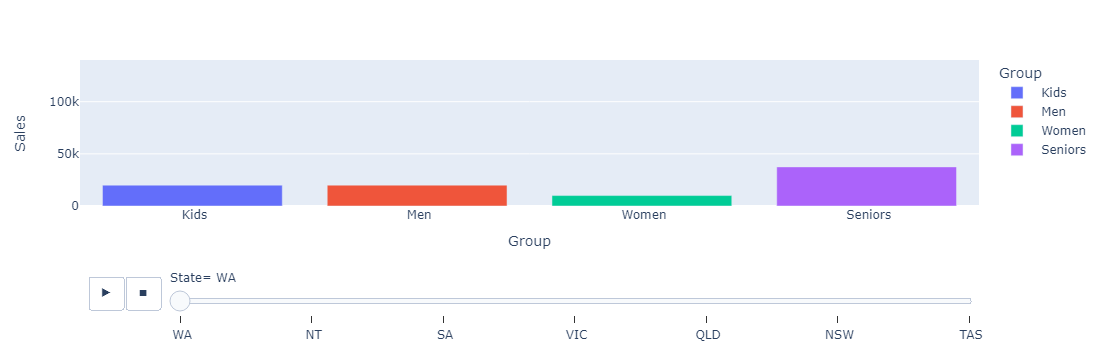

In [101]:
fig0

In [72]:
fig = px.bar (df_orig, x = df['Time'], y = df['Sales'], color = df['Time'], animation_frame = df['State'], animation_group = df['Time'] , range_y = [0, 150000])

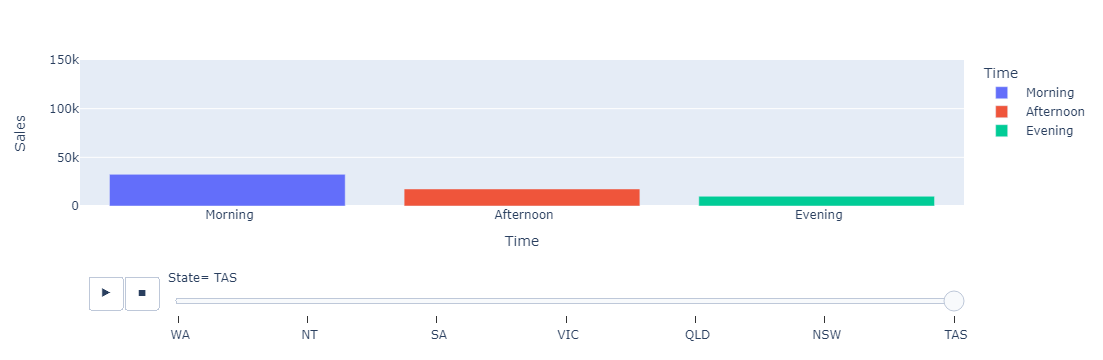

In [71]:
fig

In [133]:
state = df.groupby('State').max().reset_index()

In [136]:
state

State      Time   Group  Unit   Sales  Unit_Norm  Sales_Norm
0   NSW   Morning   Women    45  112500   0.682540    0.682540
1    NT   Morning   Women    15   37500   0.206349    0.206349
2   QLD   Morning   Women    25   62500   0.365079    0.365079
3    SA   Morning   Women    35   87500   0.523810    0.523810
4   TAS   Morning   Women    15   37500   0.206349    0.206349
5   VIC   Morning   Women    65  162500   1.000000    1.000000
6    WA   Morning   Women    15   37500   0.206349    0.206349

<BarContainer object of 7 artists>

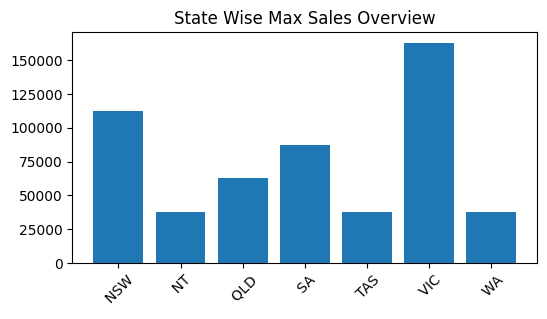

In [139]:
plt.figure(figsize=(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('State Wise Max Sales Overview')
plt.bar(x = state['State'], height = state['Sales'])

In [141]:
state = df.groupby('State').min().reset_index()

In [145]:
state

State        Time  Group  Unit  Sales  Unit_Norm  Sales_Norm
0   NSW   Afternoon   Kids    12  30000   0.158730    0.158730
1    NT   Afternoon   Kids     2   5000   0.000000    0.000000
2   QLD   Afternoon   Kids     3   7500   0.015873    0.015873
3    SA   Afternoon   Kids    10  25000   0.126984    0.126984
4   TAS   Afternoon   Kids     2   5000   0.000000    0.000000
5   VIC   Afternoon   Kids    20  50000   0.285714    0.285714
6    WA   Afternoon   Kids     2   5000   0.000000    0.000000

<BarContainer object of 7 artists>

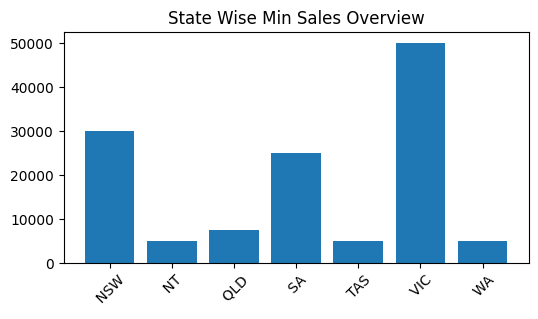

In [144]:
plt.figure(figsize=(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('State Wise Min Sales Overview')
plt.bar(x = state['State'], height = state['Sales'])

###	Group-wise Sales Analysis 

In [86]:
fig3 = px.bar (df_orig, x = df_orig['Group'], y = df_orig['Sales'], color = df_orig['Group'], animation_frame = df_orig['Date'], animation_group = df_orig['Group'] , range_y = [0, 40000])

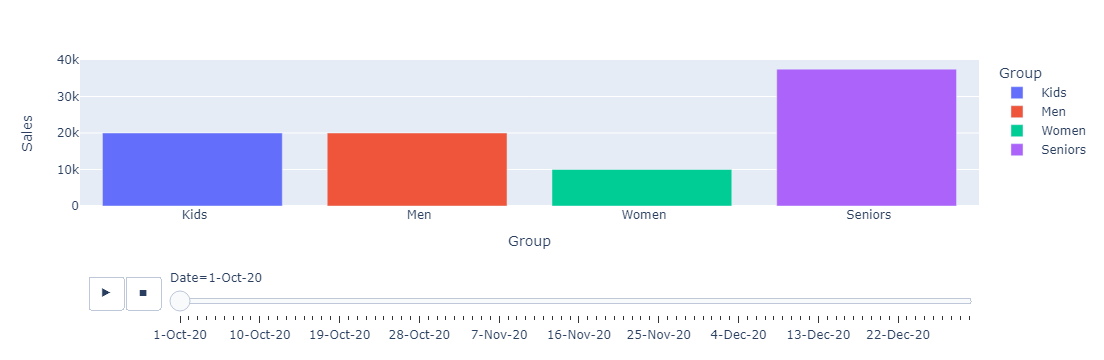

In [87]:
fig3

In [88]:
fig4 = px.bar (df_orig, x = df_orig['Group'], y = df_orig['Sales'], color = df_orig['Group'], animation_frame = df_orig['Time'], animation_group = df_orig['Group'] , range_y = [0, 40000])

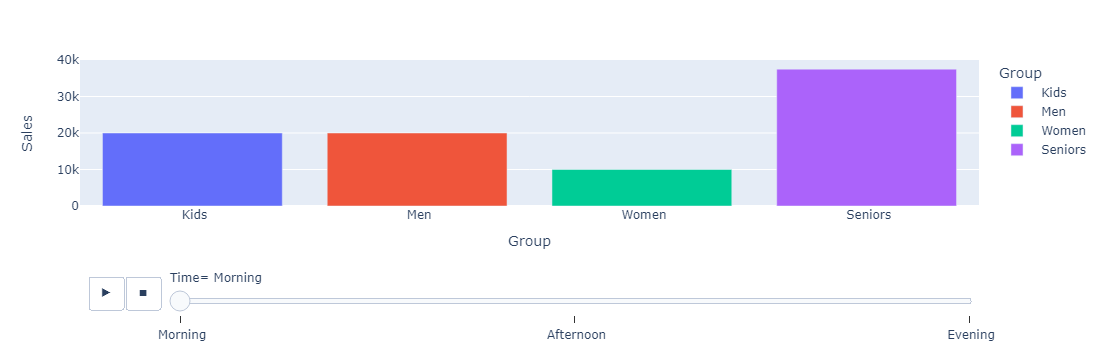

In [89]:
fig4

In [154]:
fig5 = px.bar (df_orig, x = df_orig['State'], y = df_orig['Sales'], color = df_orig['State'], animation_frame = df_orig['Time'], animation_group = df_orig['State'] , range_y = [0, 140000])

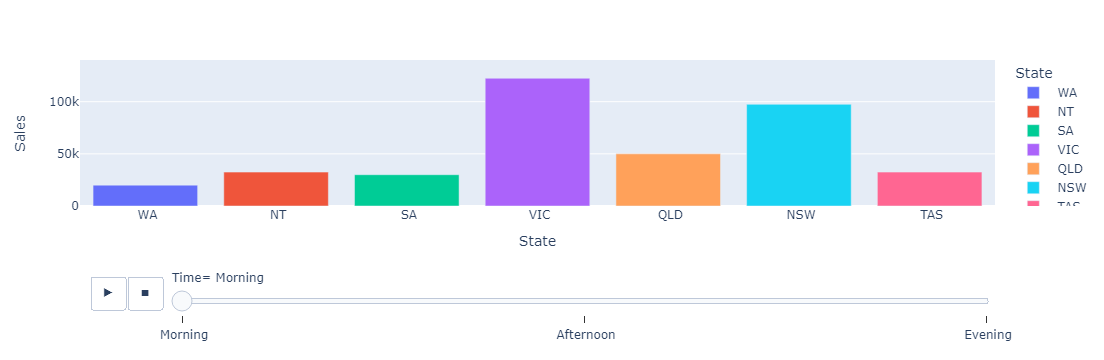

In [155]:
fig5

### 	Time-of-the-Day Analysis

In [74]:
fig2 = px.bar (df_orig, x = df_orig['Time'], y = df_orig['Sales'], color = df_orig['Time'], animation_frame = df_orig['Date'], animation_group = df_orig['Group'] , range_y = [0, 150000])

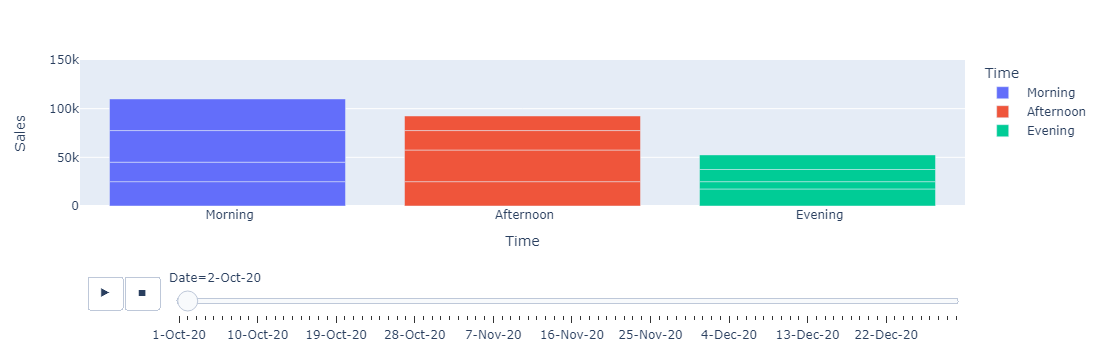

In [75]:
fig2

In [158]:
fig6 = px.bar (df_orig, x = df_orig['Group'], y = df_orig['Sales'], color = df_orig['Group'], animation_frame = df_orig['Date'], animation_group = df_orig['Group'] , range_y = [0, 40000])

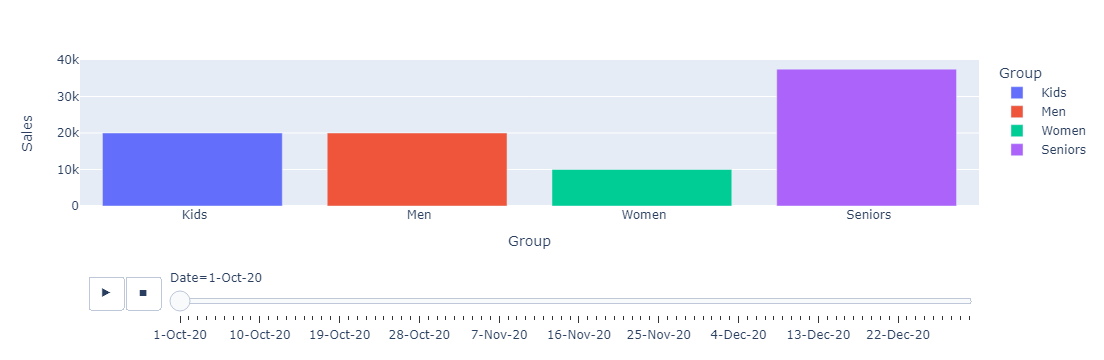

In [159]:
fig6

In [160]:
dfw = dfw.reset_index()

In [161]:
dfw

Date       Unit         Sales  Unit_Norm  Sales_Norm
0  2020-10-04  17.910714  44776.785714   0.252551    0.252551
1  2020-10-11  18.369048  45922.619048   0.259826    0.259826
2  2020-10-18  18.122449  45306.122449   0.255912    0.255912
3  2020-10-25  18.241497  45603.741497   0.257802    0.257802
4  2020-11-01  17.307540  43268.849206   0.242977    0.242977
5  2020-11-08  14.193878  35484.693878   0.193554    0.193554
6  2020-11-15  14.403061  36007.653061   0.196874    0.196874
7  2020-11-22  14.362245  35905.612245   0.196226    0.196226
8  2020-11-29  14.610544  36526.360544   0.200167    0.200167
9  2020-12-06  20.151361  50378.401361   0.288117    0.288117
10 2020-12-13  21.445578  53613.945578   0.308660    0.308660
11 2020-12-20  21.534014  53835.034014   0.310064    0.310064
12 2020-12-27  21.612245  54030.612245   0.311305    0.311305
13 2021-01-03  21.892857  54732.142857   0.315760    0.315760

<BarContainer object of 14 artists>

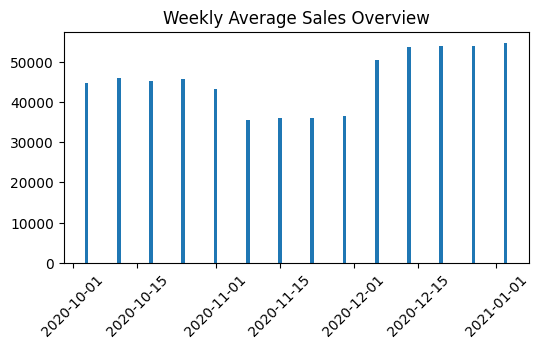

In [162]:
plt.figure(figsize=(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Weekly Average Sales Overview')
plt.bar(x = dfw['Date'], height = dfw['Sales'])

In [163]:
mdf = mdf.reset_index()

In [164]:
mdf

Date       Unit         Sales  Unit_Norm  Sales_Norm
0 2020-10-31  18.160927  45402.317177   0.256523    0.256523
1 2020-11-30  14.975454  37438.633787   0.205960    0.205960
2 2020-12-31  21.185799  52964.498299   0.304536    0.304536
3 2021-01-31  21.892857  54732.142857   0.315760    0.315760

<BarContainer object of 4 artists>

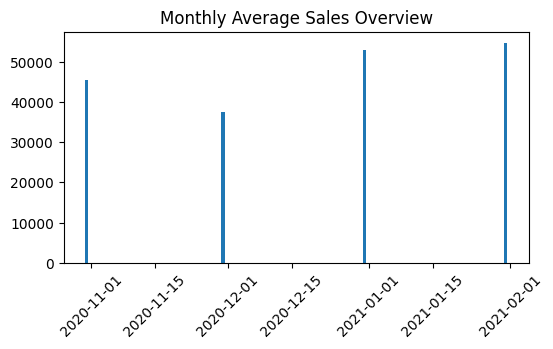

In [165]:
plt.figure(figsize=(6,3), dpi = 100)
plt.tick_params(axis = 'x', rotation = 45)
plt.title('Monthly Average Sales Overview')
plt.bar(x = mdf['Date'], height = mdf['Sales'])

### Histogram of Sales

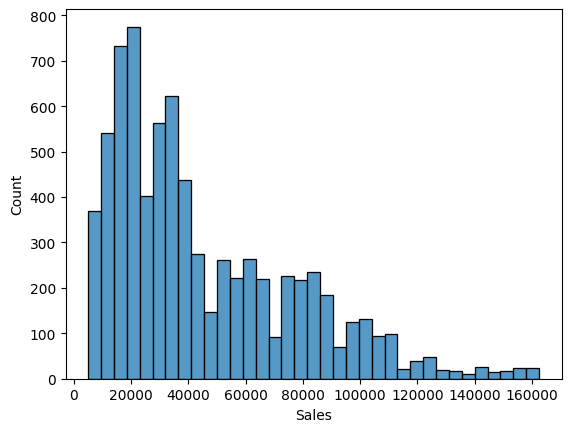

In [168]:
sns.histplot(df['Sales'])
plt.show()

### Observations from the Data

- In all the states maximum sales came from Women & Minimum sales from Kids.
- Among all the states Maximum sales came from WA & Minimum sales from NSW.
- Among all the Times, Morning Time sales were highest & Afternoon sales being Lowest.
- Average Morning time sales were higher followed by Afternoon sales and then Evening sales.
- Average Men sales were higher followed by Women, kids & then Seniors.
- Among all states, Average VIC state sales were highest followed by NSW, SA etc, WA being lowest.
- In all the states maximum sales occured on 09-OCt-20 & Minimum sales on 1-Dec-20